# 음식점 데이터 
[LOCALDATA](https://www.localdata.go.kr/main.do)의 `식품>음식점>일반음식점` 데이터

In [1]:
#@title google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
#@title 압축 풀기
!unzip data/restaurant/07_23_02_P_CSV.zip -d data/restaurant/

Archive:  data/restaurant/07_23_02_P_CSV.zip
  inflating: data/restaurant/fulldata_07_23_02_P_������������.csv  


In [6]:
import pandas as pd

In [63]:
rstr = pd.read_csv('data/restaurant/uheung.csv', encoding='cp949')
rstr.head(5)
print(f'national wide size: {len(rstr)}')

national wide size: 52371


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (11,44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
rstr.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총직원수',
       '본사직원수', '공장사무직직원수', '공장판매직직원수', '공장생산직직원수', '건물소유구분명', '보증액', '월세액',
       '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지', 'Unnamed: 47'],
      dtype='object')

## 챙길 컬럼
- `관리번호`
- `개방자치단체코드`
- `좌표정보(x)`
- `좌표정보(y)`

--------------------------
- 일자 데이터 `str` -> `date` 변환 
- && `nw_rstr['폐업일자']` > '2021-12-31'  
- && 2019-01-01 >= `nw_rstr['인허가일자']`   

In [65]:
#@title datatype str로 통일
rstr['폐업일자'].map(type).unique()

# type == str -> 폐업했다는 소리
# type == float -> 아직 폐업 안 해서 NaN값

array([<class 'float'>, <class 'str'>], dtype=object)

In [66]:
rstr['폐업일자'] = rstr['폐업일자'].map(str)
rstr['인허가일자'] = rstr['인허가일자'].map(str)

In [67]:
rstr[['폐업일자', '인허가일자']]

,폐업일자,인허가일자
0,nan,2006-06-05
1,nan,2006-07-10
2,nan,2006-07-28
3,nan,2006-10-17
4,nan,2006-10-20
...,...,...
52366,2022-12-27,2020-12-09
52367,2021-02-01,2020-11-26
52368,2021-01-06,2020-03-17
52369,2013-05-27,2004-12-21


In [68]:
#@title '1996-06-00' 같이 00일로 되어있는 날짜 01로 변경
rstr['폐업일자'] = rstr['폐업일자'].apply(lambda x : x[:-2]+'01' if x[-2:] == '00' else x)
rstr['인허가일자'] = rstr['인허가일자'].apply(lambda x : x[:-2]+'01' if x[-2:] == '00' else x)

In [69]:
rstr[['폐업일자', '인허가일자']]

,폐업일자,인허가일자
0,nan,2006-06-05
1,nan,2006-07-10
2,nan,2006-07-28
3,nan,2006-10-17
4,nan,2006-10-20
...,...,...
52366,2022-12-27,2020-12-09
52367,2021-02-01,2020-11-26
52368,2021-01-06,2020-03-17
52369,2013-05-27,2004-12-21


In [70]:
#@title mm 1-12 벗어나는 row 드랍
tt = '1993-06-01'
tt[5:7]

'06'

In [71]:
# month list
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [72]:
mask1 = (rstr['폐업일자'] != 'nan') & (rstr['폐업일자'].str[5:7].isin(months) == False) # string [5:7]인덱스(mm에 해당)가 1~12 중에 존재하지 않으면
mask2 = (rstr['인허가일자'] != 'nan') & (rstr['인허가일자'].str[5:7].isin(months) == False) # string [5:7]인덱스(mm에 해당)가 1~12 중에 존재하지 않으면
mask3 = (rstr['인허가일자'] == 'nan') # 인허가일자가 없으면

In [73]:
print(rstr[rstr['폐업일자'] == 'nan']['폐업일자'].count()) # 아직 폐업 X
print(rstr[rstr['인허가일자'] == 'nan']['인허가일자'].count()) # 인허가일자가 없는 행들은 문제가 됨

26265
1


In [74]:
# 폐업일자, 인허가일자 제거해줘야하는 행들
print(rstr[mask1]['폐업일자'].count())
print(rstr[mask2]['인허가일자'].count())
print(rstr[mask3]['인허가일자'].count())

0
0
1


In [75]:
rstr[mask1 | mask2 | mask3][['폐업일자', '인허가일자']]

,폐업일자,인허가일자
38941,1996-07-04,nan


In [76]:
rstr.reset_index(drop=True, inplace=True)
rstr.drop(rstr[mask1 | mask2 | mask3].index, inplace=True) # 행 drop

In [77]:
rstr[['폐업일자', '인허가일자']]

,폐업일자,인허가일자
0,nan,2006-06-05
1,nan,2006-07-10
2,nan,2006-07-28
3,nan,2006-10-17
4,nan,2006-10-20
...,...,...
52366,2022-12-27,2020-12-09
52367,2021-02-01,2020-11-26
52368,2021-01-06,2020-03-17
52369,2013-05-27,2004-12-21


In [78]:
#@title 'nan' 제외 나머지 date 형태로 변경
# ValueError: day is out of range for month 예외처리 해줘야함
rstr['폐업일자'] = pd.to_datetime(rstr['폐업일자'], errors='coerce')
rstr['인허가일자'] = pd.to_datetime(rstr['인허가일자'], errors='coerce')

In [79]:
rstr[['폐업일자', '인허가일자']]

,폐업일자,인허가일자
0,NaT,2006-06-05
1,NaT,2006-07-10
2,NaT,2006-07-28
3,NaT,2006-10-17
4,NaT,2006-10-20
...,...,...
52366,2022-12-27,2020-12-09
52367,2021-02-01,2020-11-26
52368,2021-01-06,2020-03-17
52369,2013-05-27,2004-12-21


In [80]:
# timestamp 크기 비교 가능
rstr['폐업일자'][40750] < pd.Timestamp('2022-09-01')

True

In [81]:
mask1 = (~rstr['폐업일자'].isna()) & (rstr['폐업일자'] < pd.Timestamp('2019-01-01'))
mask2 = (~rstr['인허가일자'].isna()) & (rstr['인허가일자'] > pd.Timestamp('2021-12-31'))

rstr.drop(rstr[mask1 | mask2].index, inplace=True)

In [82]:
rstr[['폐업일자', '인허가일자']]

,폐업일자,인허가일자
0,NaT,2006-06-05
1,NaT,2006-07-10
2,NaT,2006-07-28
3,NaT,2006-10-17
4,NaT,2006-10-20
...,...,...
52365,2019-06-18,2018-11-06
52366,2022-12-27,2020-12-09
52367,2021-02-01,2020-11-26
52368,2021-01-06,2020-03-17


In [83]:
print(rstr['폐업일자'].min())
print(rstr['인허가일자'].max())

2019-01-02 00:00:00
2021-12-31 00:00:00


In [84]:
#@title filter 적용해서 프레임 뽑기
rstr = rstr[['관리번호', '개방자치단체코드', '좌표정보(x)', '좌표정보(y)']]
rstr

,관리번호,개방자치단체코드,좌표정보(x),좌표정보(y)
0,3630000-102-2006-00009,3630000,185880.086598,191241.520048
1,3630000-102-2006-00013,3630000,185697.510050,191262.531468
2,3630000-102-2006-00014,3630000,185697.510050,191262.531468
3,3630000-102-2006-00016,3630000,185956.390037,191106.914065
4,3630000-102-2006-00017,3630000,186089.124391,191063.262512
...,...,...,...,...
52365,5310000-102-2018-00002,5310000,301698.040172,188081.813977
52366,3330000-102-2020-00008,3330000,396864.269411,186789.879379
52367,3270000-102-2020-00001,3270000,388002.448307,184046.278157
52368,3370000-102-2020-00003,3370000,389425.128230,189489.778723


In [85]:
# nw_rstr.to_csv('nw_rstr.csv')

## 일부 지역 필터링

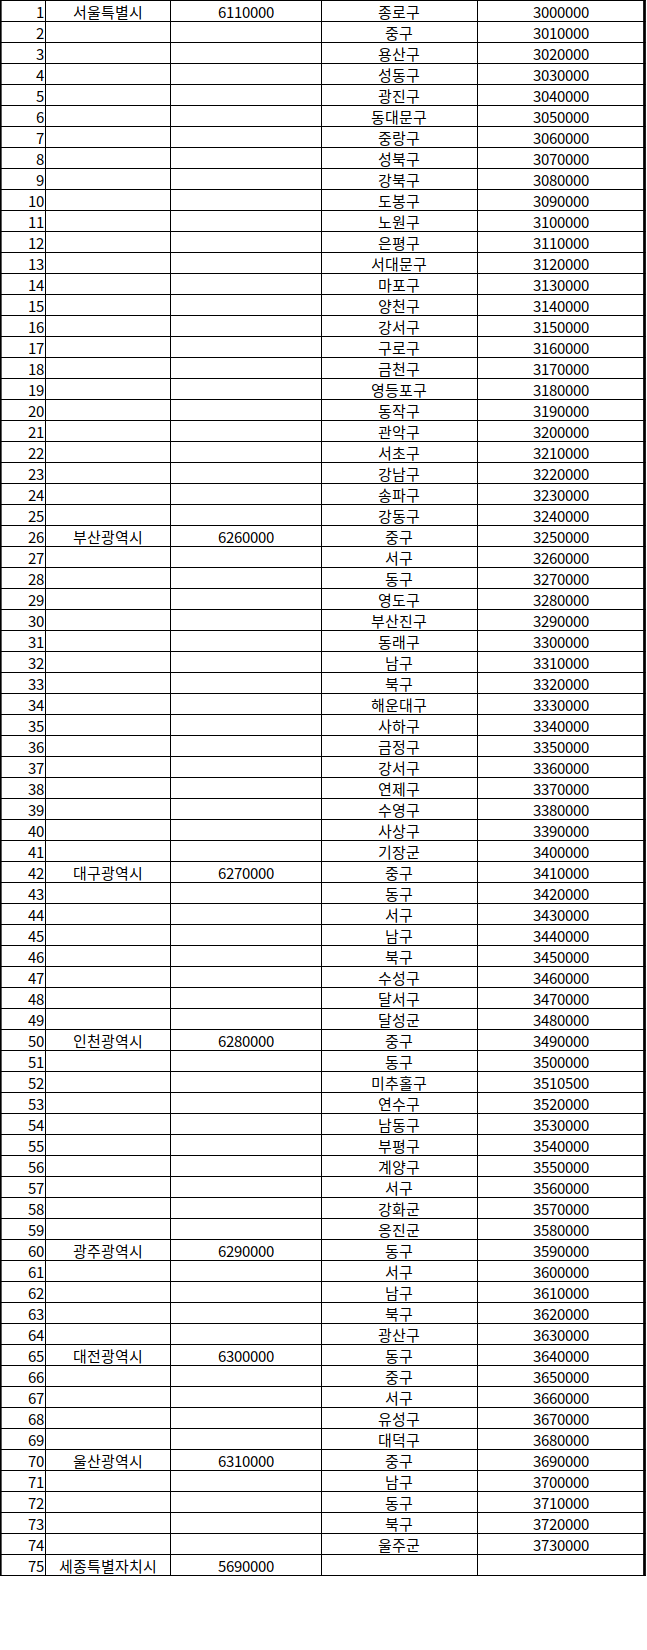

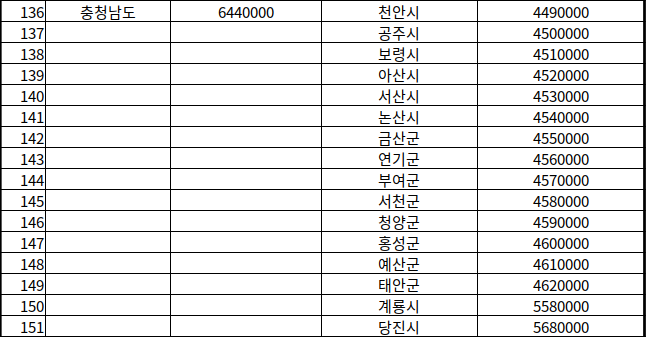

In [86]:
# nw_rstr = pd.read_csv('nw_rstr.csv')

In [87]:
print(len(rstr))
rstr.head(3)

29812


,관리번호,개방자치단체코드,좌표정보(x),좌표정보(y)
0,3630000-102-2006-00009,3630000,185880.086598,191241.520048
1,3630000-102-2006-00013,3630000,185697.510050,191262.531468
2,3630000-102-2006-00014,3630000,185697.510050,191262.531468


In [88]:
#@title localCode에 맞는거만 필터링
su_localCode = [i*10000 for i in range(300, 325)]
bs_localCode = [i*10000 for i in range(325, 341)]
dg_localCode = [i*10000 for i in range(341, 349)]
ic_localCode = [i*10000 for i in range(349, 359)]
gj_localCode = [i*10000 for i in range(359, 364)]
dj_localCode = [i*10000 for i in range(364, 369)]
us_localCode = [i*10000 for i in range(369, 374)]
sj_localCode = [5690000]

In [89]:
nw_localCode = su_localCode + bs_localCode + dg_localCode + ic_localCode + gj_localCode + dj_localCode + us_localCode + sj_localCode

In [90]:
rstr = rstr[rstr['개방자치단체코드'].isin(nw_localCode)]

In [91]:
print(len(rstr))
rstr.head(3)

9353


,관리번호,개방자치단체코드,좌표정보(x),좌표정보(y)
0,3630000-102-2006-00009,3630000,185880.086598,191241.520048
1,3630000-102-2006-00013,3630000,185697.510050,191262.531468
2,3630000-102-2006-00014,3630000,185697.510050,191262.531468


In [92]:
#@title transform 바로 할 수 없는 상황
rstr['좌표정보(y)'].map(type).unique

<bound method Series.unique of 0        <class 'float'>
1        <class 'float'>
2        <class 'float'>
3        <class 'float'>
4        <class 'float'>
              ...       
52361    <class 'float'>
52362    <class 'float'>
52366    <class 'float'>
52367    <class 'float'>
52368    <class 'float'>
Name: 좌표정보(y), Length: 9353, dtype: object>

In [93]:
#@title **try** float 변환, **except** return 0
def convert_float(item):
  try:
    return float(item)
  except:
    return 0

In [94]:
rstr['좌표정보(y)'] = rstr['좌표정보(y)'].map(convert_float)

<ipython-input-94-60c9143c2600>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rstr['좌표정보(y)'] = rstr['좌표정보(y)'].map(convert_float)


In [95]:
# 0인 행 삭제
rstr.drop(rstr[rstr['좌표정보(y)'] == 0].index, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [96]:
print(len(rstr))
rstr.head(3)

9353


,관리번호,개방자치단체코드,좌표정보(x),좌표정보(y)
0,3630000-102-2006-00009,3630000,185880.086598,191241.520048
1,3630000-102-2006-00013,3630000,185697.510050,191262.531468
2,3630000-102-2006-00014,3630000,185697.510050,191262.531468


In [97]:
print(f'총 음식점 개수: {len(rstr)}')

총 음식점 개수: 9353


In [98]:
# rstr.to_csv('rstr.csv', index = False, encoding='cp949')

## 좌표계 변경
- 기존: 중부원점TM(EPSG:2097)좌표계
- 변경: 'epsg:4326' 위도 경도

In [99]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
from pyproj import Proj, transform
 
epsg2097= Proj(init="epsg:2097")
wgs84=Proj(init='epsg:4326')

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [101]:
transform(epsg2097, wgs84, 213117.592076, 437825.856238) # 변환 체크

<ipython-input-101-e33f5afcaa69>:1: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  transform(epsg2097, wgs84, 213117.592076, 437825.856238) # 변환 체크


(127.14613057655316, 37.44248701960818)

In [102]:
rstr['transformed'] = rstr.apply(lambda row : transform(epsg2097, wgs84, row['좌표정보(x)'], row['좌표정보(y)']), axis = 1)
rstr['x'] = rstr['transformed'].apply(lambda x : x[0])
rstr['y'] = rstr['transformed'].apply(lambda x : x[1])
rstr = rstr.drop(columns = ['transformed', '좌표정보(x)', '좌표정보(y)'])

<ipython-input-102-8a377a4d2b75>:1: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  rstr['transformed'] = rstr.apply(lambda row : transform(epsg2097, wgs84, row['좌표정보(x)'], row['좌표정보(y)']), axis = 1)
<ipython-input-102-8a377a4d2b75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rstr['transformed'] = rstr.apply(lambda row : transform(epsg2097, wgs84, row['좌표정보(x)'], row['좌표정보(y)']), axis = 1)
<ipython-input-102-8a377a4d2b75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [103]:
print(len(rstr))
rstr.head(3)

9353


,관리번호,개방자치단체코드,x,y
0,3630000-102-2006-00009,3630000,126.842828,35.220318
1,3630000-102-2006-00013,3630000,126.840823,35.220504
2,3630000-102-2006-00014,3630000,126.840823,35.220504


In [105]:
rstr.to_csv('data/restaurant/uheung_rstr.csv', index = False, encoding='cp949')